### Exploring Business Analytics

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#loading the data
data = pd.read_csv("https://raw.githubusercontent.com/ShawVishal/Business-Analytics-Basic-Exanple/main/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#size of dataset
print("Number of Rows and Columns: ", data.shape)

Number of Rows and Columns:  (9994, 13)


In [4]:
#Information and null value checking of data

In [5]:
#brief summary of data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#checking data for missing value
print("Percetage of missing values in each columns:")
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Percetage of missing values in each columns:
Ship Mode - 0.0%
Segment - 0.0%
Country - 0.0%
City - 0.0%
State - 0.0%
Postal Code - 0.0%
Region - 0.0%
Category - 0.0%
Sub-Category - 0.0%
Sales - 0.0%
Quantity - 0.0%
Discount - 0.0%
Profit - 0.0%


In [7]:
#checking for outliers in the dataset
z = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
z

array([[0.39830154, 0.0515104 , 0.8043034 , 0.75664349, 0.05659251],
       [0.39830154, 0.80563348, 0.35486486, 0.75664349, 0.81505408],
       [1.08681691, 0.34536777, 0.8043034 , 0.75664349, 0.09300169],
       ...,
       [1.16762886, 0.04608048, 0.8043034 , 0.21215332, 0.03954647],
       [1.16762886, 0.32133108, 0.09457367, 0.75664349, 0.06547279],
       [1.16937547, 0.02134419, 0.8043034 , 0.75664349, 0.18907752]])

In [8]:
#dropping data with z score greater than 3
cdata = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [9]:
#clean data with no outliers
cdata.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9436.000000,9436.00000,9436.000000,9436.000000,9436.000000
mean,54773.351314,178.02007,3.652183,0.135955,22.910975
std,32363.603705,292.80389,2.009529,0.174638,80.698597
min,1040.000000,0.85200,1.000000,0.000000,-653.283400
25%,22204.000000,17.90000,2.000000,0.000000,2.240025
50%,53209.000000,54.38400,3.000000,0.100000,8.878400
75%,90008.000000,199.98000,5.000000,0.200000,28.755000
max,99301.000000,2079.40000,10.000000,0.700000,701.988300


In [10]:
#dropping Unnecessary information
cdata['Country'].value_counts()

United States    9436
Name: Country, dtype: int64

In [11]:
cdata = cdata.drop('Country',axis=1)

In [12]:
cdata

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
#Looking at all the available category
cdata['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
#number of products in each category 
cdata['Category'].value_counts()

Office Supplies    5621
Furniture          2061
Technology         1754
Name: Category, dtype: int64

In [15]:
#number of products in each sub-category
cdata['Sub-Category'].value_counts()

Paper          1356
Binders        1240
Furnishings     945
Phones          868
Storage         835
Art             793
Accessories     758
Chairs          596
Appliances      388
Labels          360
Tables          302
Envelopes       254
Bookcases       218
Fasteners       211
Supplies        184
Machines         80
Copiers          48
Name: Sub-Category, dtype: int64

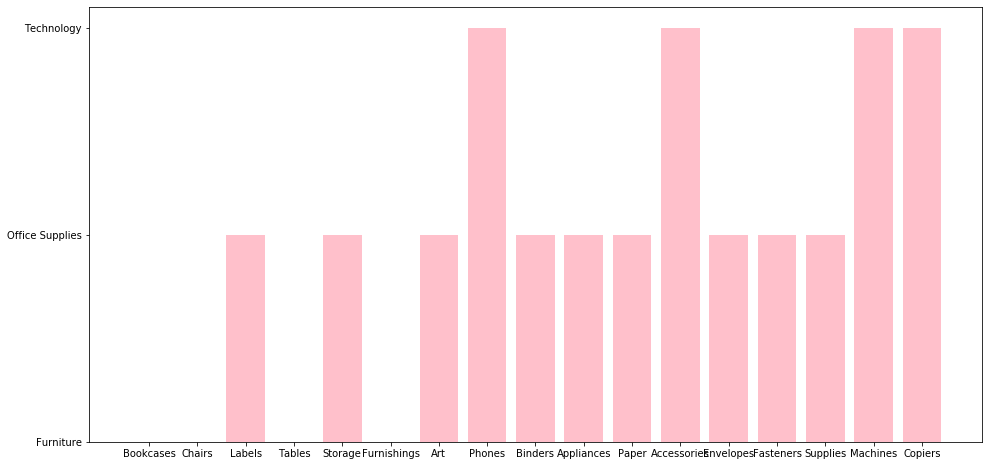

In [16]:
#Distribution of sub-category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=cdata,color='pink')
plt.show()

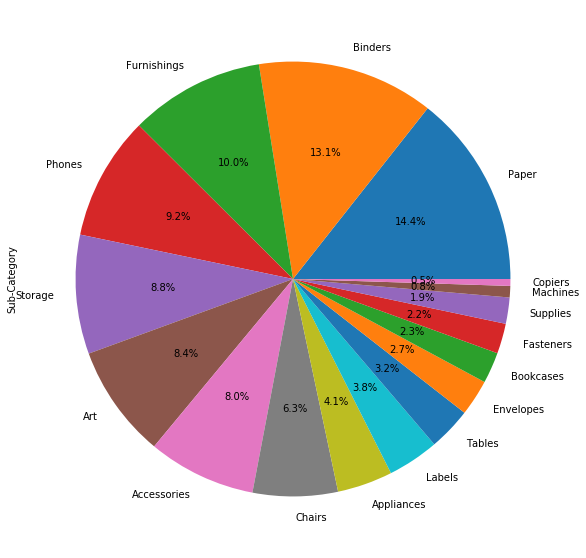

In [17]:
plt.figure(figsize=(12,10))
cdata['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


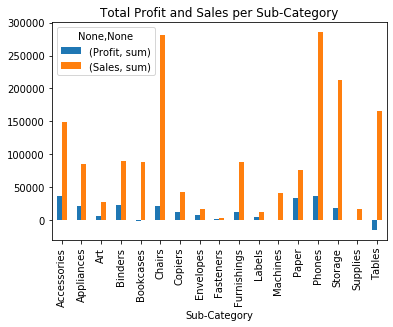

In [18]:
#profit per sub category
cdata.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

### Analysis:
#### Store has a lot of Office supplies eg, binders and paper.
#### Copier is making the most profit per sale and tables are causing a loss

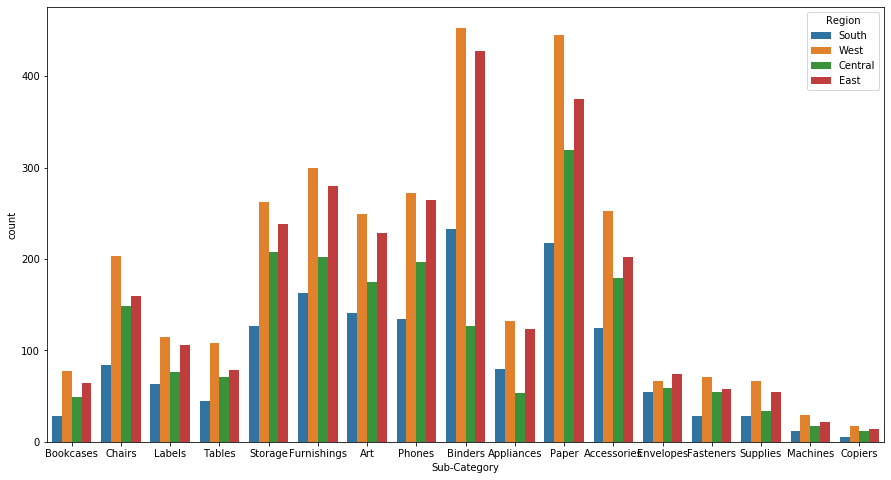

In [19]:
#sales of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=cdata)
plt.show()

In [20]:
#calculating profit percent of products
cdata['Cost']=cdata['Sales']-cdata['Profit']
cdata['Profit %']=(cdata['Profit']/cdata['Cost'])*100
cdata['Profit %']

0       19.047619
1       42.857143
2       88.679245
3      -28.571429
4       12.676056
          ...    
9989    19.402985
9990    20.481928
9991     8.108108
9992    81.818182
9993    42.857143
Name: Profit %, Length: 9436, dtype: float64

In [21]:
#Products with high Profit Percentage 
cdata.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,Standard Class,Consumer,Springfield,Oregon,97477,West,Furniture,Bookcases,217.764,6,0.7,-384.7164,602.4804,-63.855422
6121,Standard Class,Corporate,Springfield,Oregon,97477,West,Furniture,Bookcases,72.588,2,0.7,-128.2388,200.8268,-63.855422
5473,Standard Class,Consumer,Parker,Colorado,80134,West,Furniture,Bookcases,102.018,7,0.7,-183.6324,285.6504,-64.285714
4785,Standard Class,Consumer,Colorado Springs,Colorado,80906,West,Furniture,Bookcases,69.576,4,0.7,-143.7904,213.3664,-67.391304


### Analysis
#### People From western regions are using the store most
#### Furniture categorie is causing the most loss while Technology and Office Supplies are most profitable

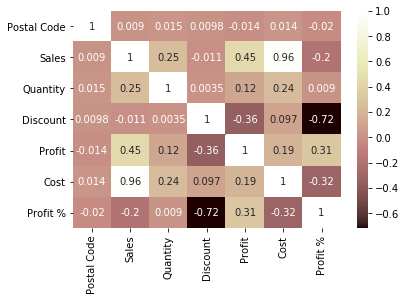

In [22]:
#finding corelations between variable
corr = cdata.corr()
sns.heatmap(corr,cmap = "pink", annot = True)
plt.show()

#### Cost and sales show the higest corelation which is natural while other variable don't show much strong relation

Standard Class    5612
Second Class      1848
First Class       1458
Same Day           518
Name: Ship Mode, dtype: int64


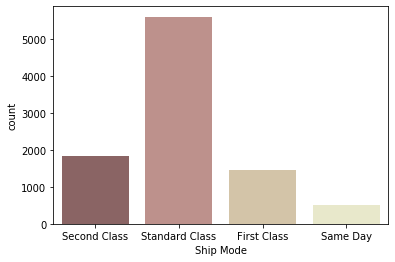

In [23]:
# Analysing Shipping method
print(cdata['Ship Mode'].value_counts())
sns.countplot(x = cdata["Ship Mode"],palette="pink")
plt.show()

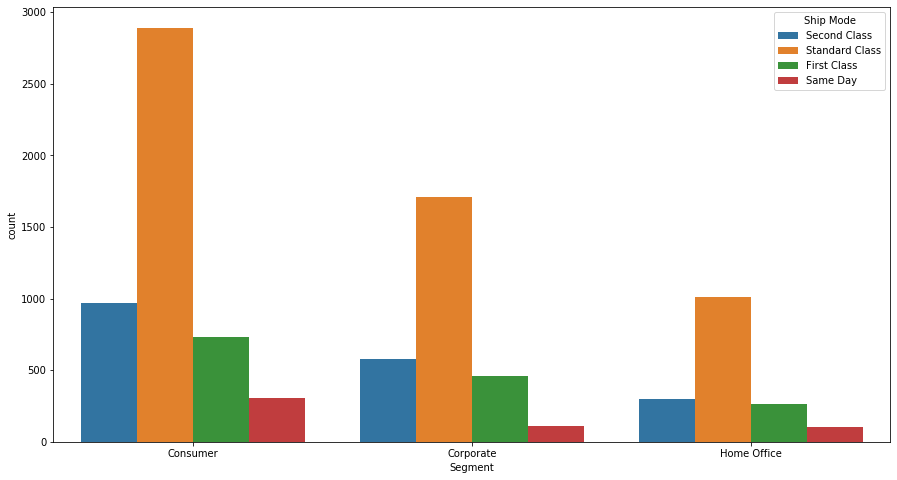

In [24]:
#distribution of shipping over types of customer
plt.figure(figsize=(15,8))
sns.countplot(x="Segment", hue="Ship Mode", data=cdata)
plt.show()

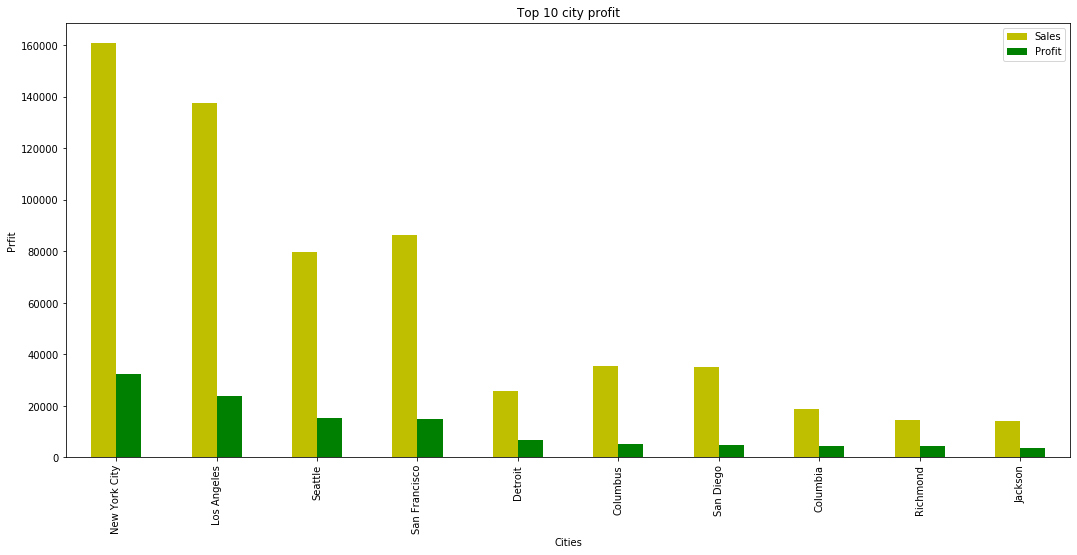

In [25]:
#Most Profitable cities
City = cdata.groupby("City")[["Sales", "Profit"]].sum().sort_values(by = "Profit", ascending = False)
City[:10].plot(kind = "bar", color = ["y", "green"],figsize= (18,8))
plt.title("Top 10 city profit")
plt.xlabel("Cities")
plt.ylabel("Prfit")
plt.show()

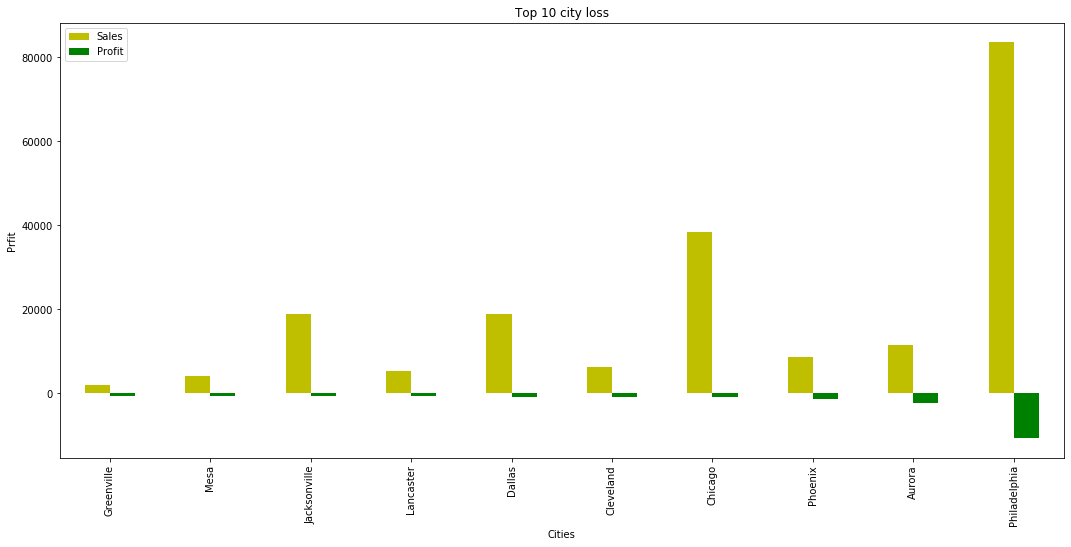

In [26]:
#Cities in most loss
City = cdata.groupby("City")[["Sales", "Profit"]].sum().sort_values(by = "Profit", ascending = False)
City[-10:].plot(kind = "bar", color = ["y", "green"],figsize= (18,8))
plt.title("Top 10 city loss")
plt.xlabel("Cities")
plt.ylabel("Prfit")
plt.show()

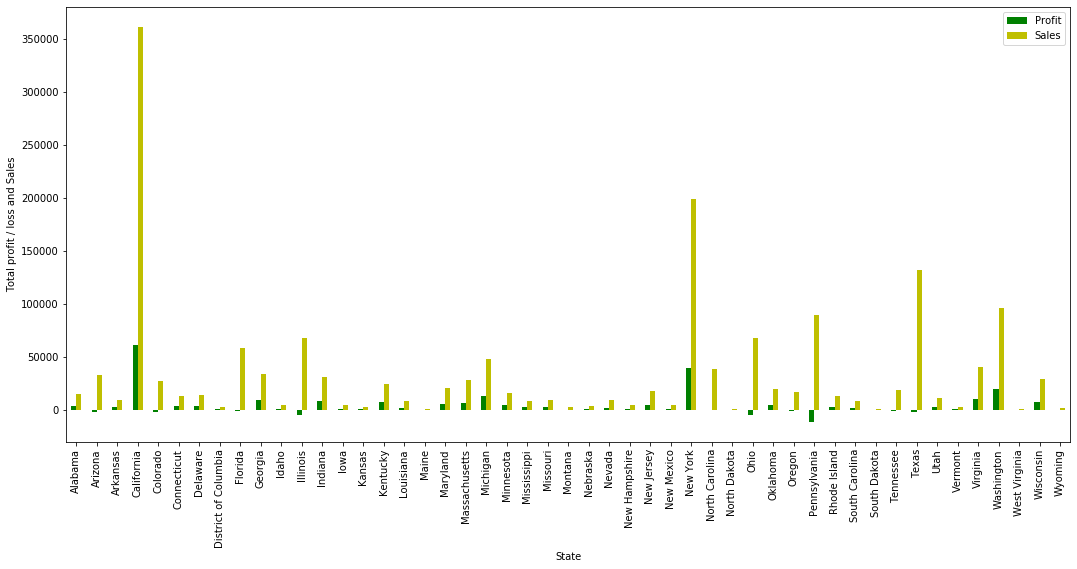

In [27]:
#overall state profits
cdata.groupby('State')[['Profit', 'Sales']].sum().plot.bar(color = ["green", "y"],figsize= (18,8))
plt.ylabel("Total profit / loss and Sales")
plt.show()

### Analysis
#### Standard Class remain the preferred method amoung all types of customer
#### New York and LA are making the most profit while Aurora and Philadelphia are in highest loss